In [1]:
import os,sys,warnings


if not sys.warnoptions:
    warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
data

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
## Data has a header so we should from the next header
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
data.shape

(246, 14)

In [5]:
columns = data.columns
columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
def find_unique_items(data, columns):
    for col in columns:
        print('='*50)
        print(f'{col}: {data[col].unique()}')

In [7]:
find_unique_items(data,columns)

day: ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'Sidi-Bel Abbes Region Dataset' 'day']
month: ['06' '07' '08' '09' nan 'month']
year: ['2012' nan 'year']
Temperature: ['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' nan 'Temperature' '38' '39' '40' '42']
 RH: ['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' nan ' RH' '44'
 '41' '42' '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33'
 '35' '39' '31' '21' '40' '24' '38' '26']
 Ws: ['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' nan
 ' Ws' '10' '9' '8' '6' '29']
Rain : ['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' nan 'Ra

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [10]:
data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.loc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [13]:
data.loc[:122,'Region'] = 0
data.loc[122:,'Region'] = 1

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [15]:
data['Region'] = data['Region'].astype('int64')

In [16]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [17]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [18]:
data.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [19]:
data = data.dropna().reset_index(drop=True)

In [20]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [22]:
data.loc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [23]:
data = data.drop(122).reset_index(drop=True)

In [24]:
data.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 122, dtype: object

In [25]:
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
columns = data.columns[:-2]
columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [27]:
def convert_data_type(data, columns, type):
    for col in columns:
        data[col] = data[col].astype(type)

In [28]:
convert_data_type(data, columns[:6], 'int64')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [30]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [31]:
convert_data_type(data, columns[6:], 'float64')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [33]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [34]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Exploratory Data Analysis

In [35]:
data_copy = data.drop(['day', 'month', 'year'], axis=1)

In [36]:
data_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
data_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [38]:
data_copy['Classes'] = data_copy['Classes'].str.strip()

In [39]:
data_copy['Classes'] = data_copy['Classes'].map({'fire': 1, 'not fire': 0})

In [40]:
data_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [41]:
columns = data_copy.columns
columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

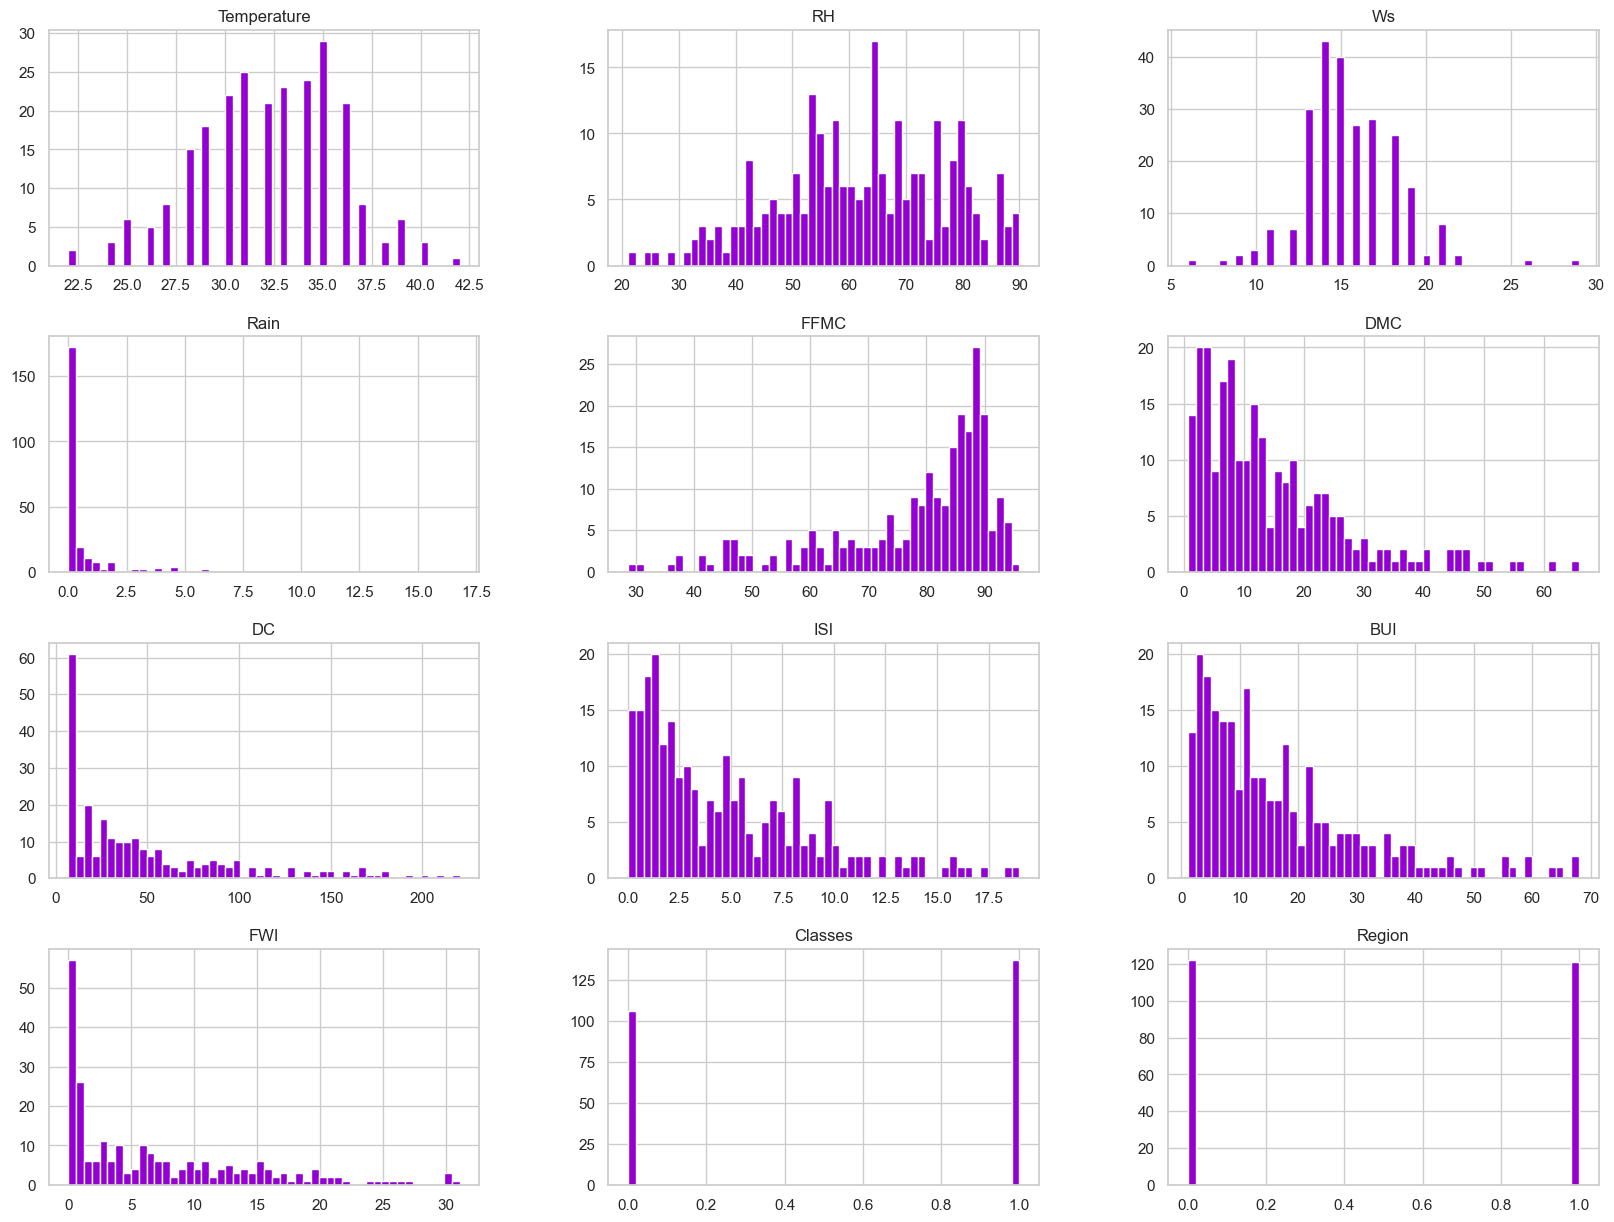

In [42]:
# plt.style.use('seaborn_theme')
data_copy.hist(bins=50,figsize=(20,15), color='darkviolet')
plt.show()

In [43]:
precentage = data_copy['Classes'].value_counts(normalize=True)*100
class_labels = ['Fire', 'Not Fire']
colors = ['red', 'blue']
explode = [0, 0.1]

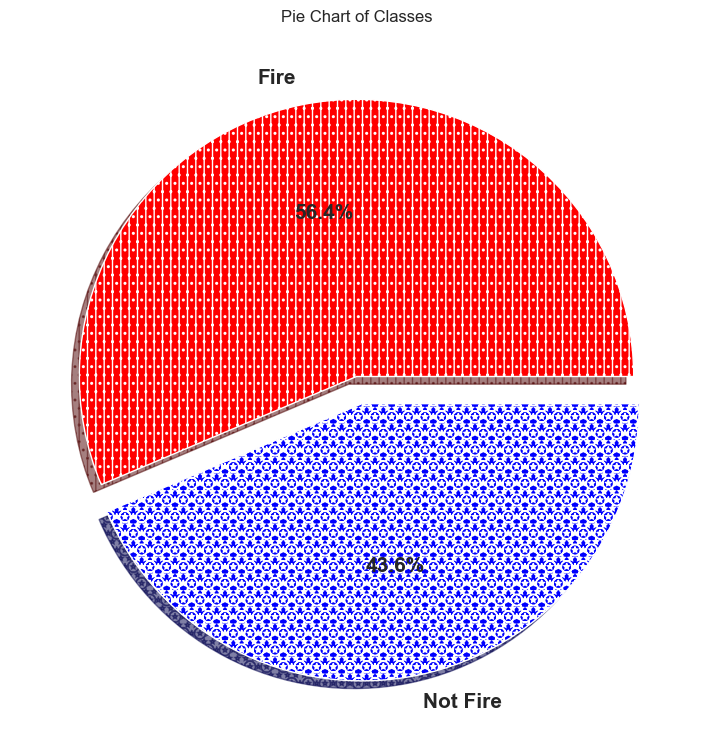

In [44]:
plt.figure(figsize=(15,9))
plt.pie(precentage, labels=class_labels, autopct='%1.1f%%', shadow=True, colors=colors, hatch=['.||.', '**O'], explode=explode, textprops={
    'fontsize': 15, 'fontweight': 'bold'})
plt.title('Pie Chart of Classes')
plt.show()

In [45]:
corr_matrix = data_copy.corr()
corr_matrix

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


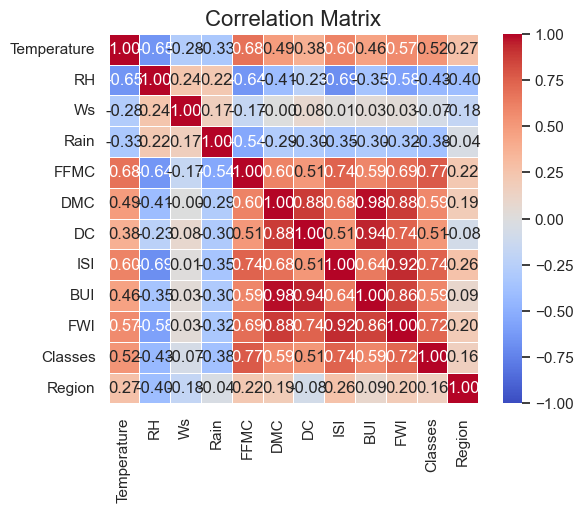

In [46]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor= 'white', square=True, center=0, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

<Axes: ylabel='FWI'>

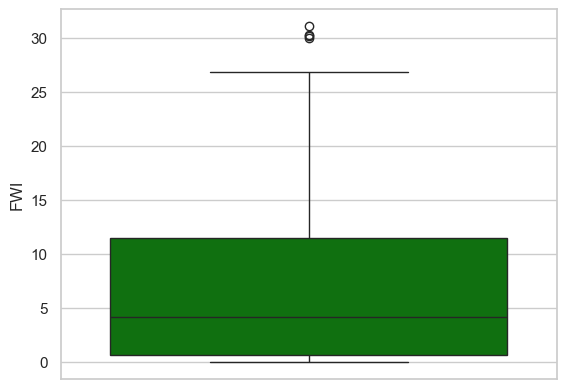

In [47]:
sns.boxplot(data_copy['FWI'], color='green')

In [48]:
data['Classes'] = data['Classes'].str.strip()

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

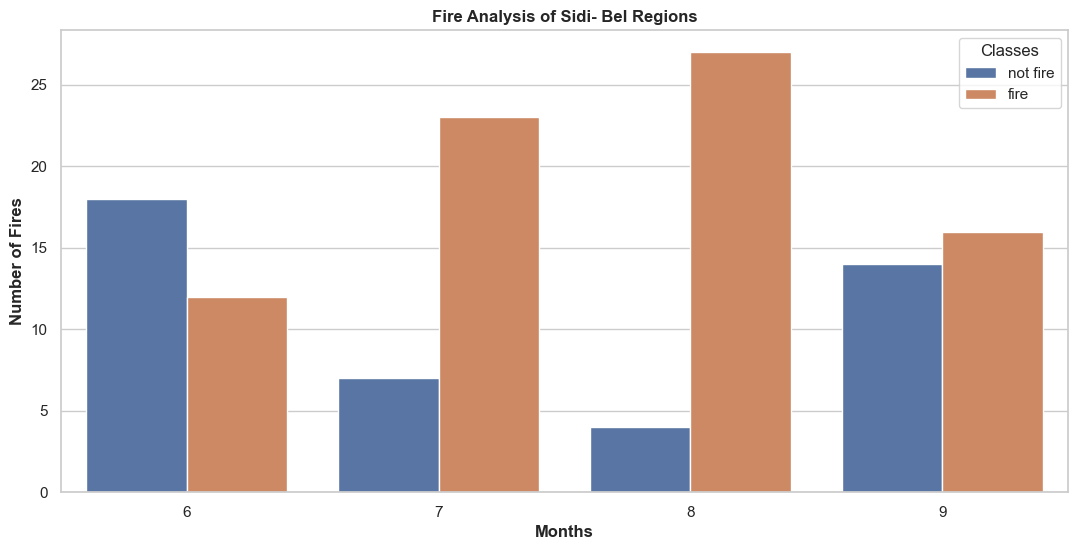

In [49]:
datatemp=data.loc[data['Region']==1]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=datatemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

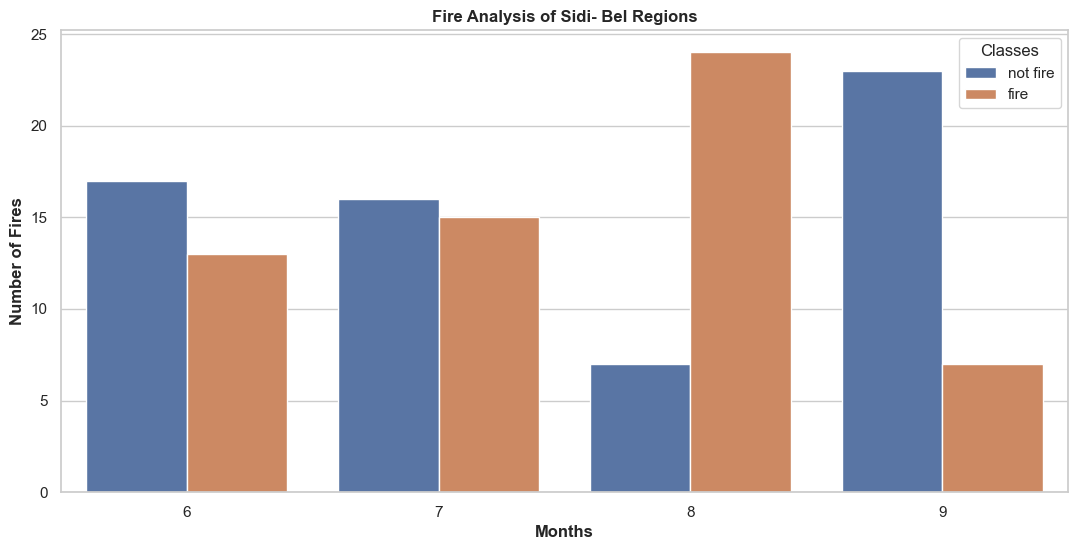

In [50]:
datatemp=data.loc[data['Region']==0]
plt.subplots(figsize=(13,6))
sns.countplot(x='month',hue='Classes',data=datatemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

# Model training

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
X = data_copy.drop('FWI', axis=1)
y = data_copy['FWI']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
def get_high_correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [66]:
corr_features = get_high_correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [67]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Before After Scaling')

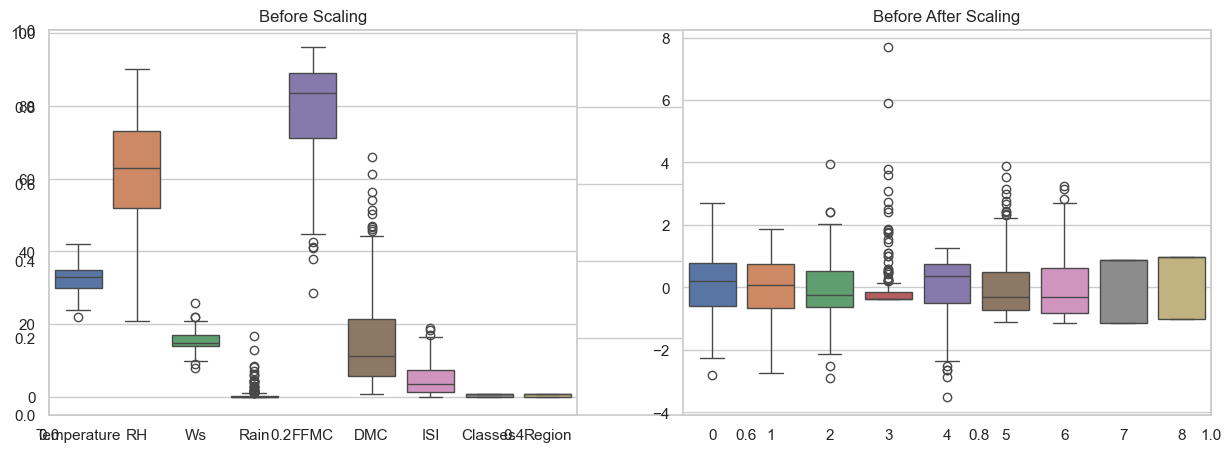

In [69]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Before After Scaling')

In [70]:
def metric_scores(y_train, y_train_pred, y_test, y_test_pred):
    train_MAE = mean_absolute_error(y_train, y_train_pred)
    test_MAE = mean_absolute_error(y_test, y_test_pred)

    train_MSE = mean_squared_error(y_train,y_train_pred)
    test_MSE = mean_squared_error(y_test, y_test_pred)

    train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_R2 = r2_score(y_train,y_train_pred)
    test_R2 = r2_score(y_test, y_test_pred)
    scores = {
    'train' : {
        'train_MAE': train_MAE,
        'train_MSE': train_MSE,
        'train_RMSE': train_RMSE,
        'train_R2': train_R2
            },

    'test' : {
        'test_MAE': test_MAE,
        'test_MSE': test_MSE,
        'test_RMSE': test_RMSE,
        'test_R2': test_R2
        }
    }
    print(f"Train scores are {scores['train']}")
    print(f"Test scores are {scores['test']}")

# Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
y_train_pred = linear.predict(X_train_scaled)
y_test_pred = linear.predict(X_test_scaled)

In [73]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 0.7399061305412509, 'train_MSE': 1.720636869750728, 'train_RMSE': np.float64(1.311730486704768), 'train_R2': 0.9716397291602472}
Test scores are {'test_MAE': 0.5049978694165663, 'test_MSE': 0.5882990110708648, 'test_RMSE': np.float64(0.7670065260940514), 'test_R2': 0.9805895859259883}


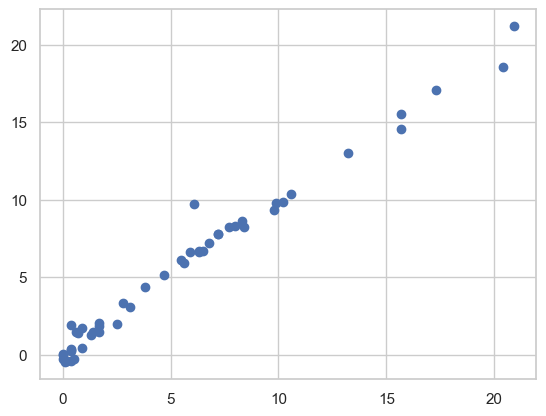

In [74]:
plt.scatter(y_test, y_test_pred)

# Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [76]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [77]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 1.2912052419838411, 'train_MSE': 3.2357983053255928, 'train_RMSE': np.float64(1.798832483953298), 'train_R2': 0.9466661920739026}
Test scores are {'test_MAE': 1.0093958923873407, 'test_MSE': 1.726042325023142, 'test_RMSE': np.float64(1.31378930008702), 'test_R2': 0.9430507350726562}


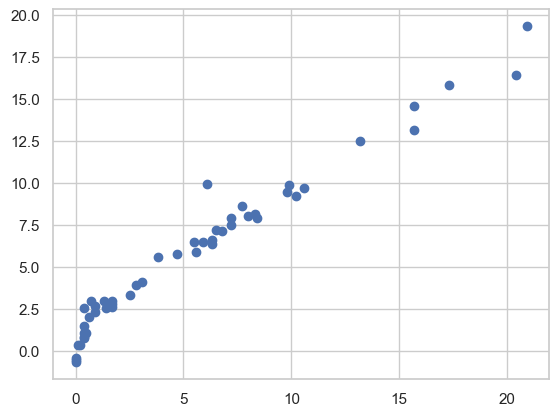

In [78]:
plt.scatter(y_test, y_test_pred)

# Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [80]:
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

In [81]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 0.7542683267880075, 'train_MSE': 1.72319992529232, 'train_RMSE': np.float64(1.312707098058177), 'train_R2': 0.9715974837855172}
Test scores are {'test_MAE': 0.5192048325844728, 'test_MSE': 0.6029616070548557, 'test_RMSE': np.float64(0.7765060251246321), 'test_R2': 0.9801058063273602}


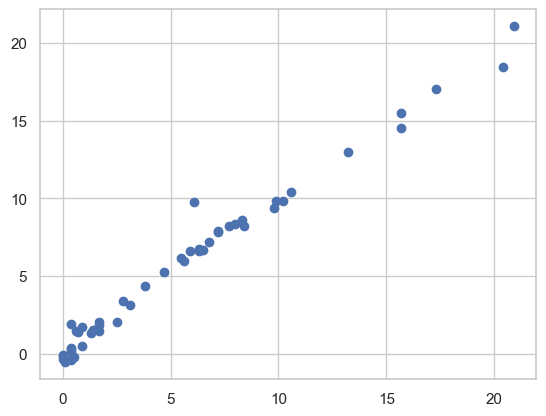

In [82]:
plt.scatter(y_test, y_test_pred)

# ElasticNet

In [83]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [84]:
y_train_pred = elasticnet.predict(X_train_scaled)
y_test_pred = elasticnet.predict(X_test_scaled)

In [85]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 1.9344343772944148, 'train_MSE': 6.669962936377333, 'train_RMSE': np.float64(2.582627138473019), 'train_R2': 0.8900628257523168}
Test scores are {'test_MAE': 1.6834416340136709, 'test_MSE': 4.009921298441002, 'test_RMSE': np.float64(2.0024787885121285), 'test_R2': 0.8676961352267807}


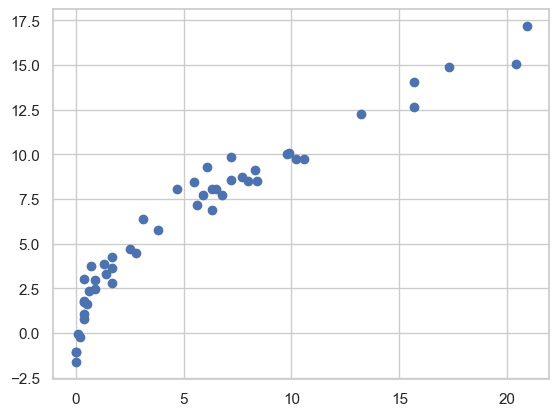

In [86]:
plt.scatter(y_test, y_test_pred)

# LassoCV

In [88]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [89]:
lasso_cv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

In [90]:
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

In [91]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 0.762411608772731, 'train_MSE': 1.759062122182445, 'train_RMSE': np.float64(1.3262963930368072), 'train_R2': 0.9710063877590442}
Test scores are {'test_MAE': 0.5556715031617872, 'test_MSE': 0.6568370026125329, 'test_RMSE': np.float64(0.8104548121965425), 'test_R2': 0.978328234520343}


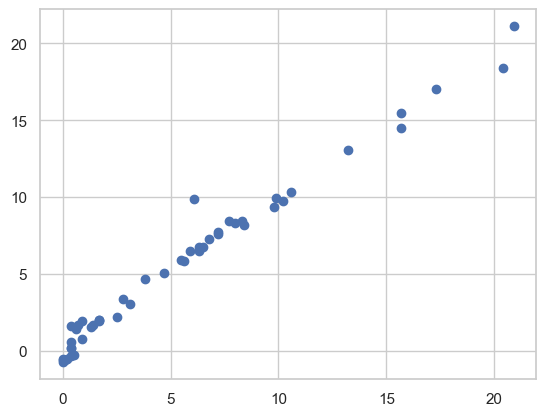

In [92]:
plt.scatter(y_test, y_test_pred)

# RidgeCV

In [93]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [94]:
y_train_pred = ridge_cv.predict(X_train_scaled)
y_test_pred = ridge_cv.predict(X_test_scaled)

In [95]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 0.9033770695465777, 'train_MSE': 1.9008719011084478, 'train_RMSE': np.float64(1.3787211107067476), 'train_R2': 0.9686690184925996}
Test scores are {'test_MAE': 0.68692620082771, 'test_MSE': 0.8419867979327424, 'test_RMSE': np.float64(0.9175983859689065), 'test_R2': 0.9722193780965628}


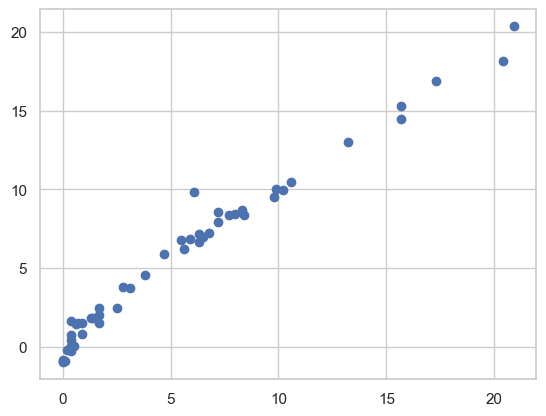

In [96]:
plt.scatter(y_test, y_test_pred)

In [97]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

# ElasticNetCV

In [98]:
from sklearn.linear_model import ElasticNetCV

elasticnet_cv = ElasticNetCV(cv=5)
elasticnet_cv.fit(X_train_scaled, y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [99]:
y_train_pred = elasticnet_cv.predict(X_train_scaled)
y_test_pred = elasticnet_cv.predict(X_test_scaled)

In [100]:
metric_scores(y_train, y_train_pred, y_test, y_test_pred)

Train scores are {'train_MAE': 0.7868098366858435, 'train_MSE': 1.7494105656356576, 'train_RMSE': np.float64(1.3226528515206315), 'train_R2': 0.9711654688310033}
Test scores are {'test_MAE': 0.5710147088777218, 'test_MSE': 0.6637102658943733, 'test_RMSE': np.float64(0.8146841510023215), 'test_R2': 0.9781014571778188}


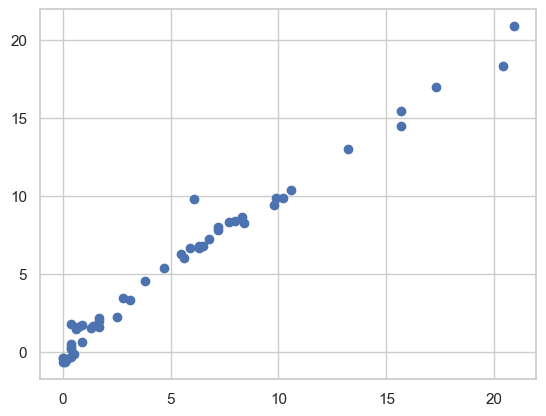

In [101]:
plt.scatter(y_test, y_test_pred)

In [102]:
elasticnet_cv.get_params()

{'alphas': 'warn',
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 'deprecated',
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

# Pickling the Models

In [105]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))